# Fictitious PLay vs Fictitious PLay

In [18]:
from games.mp import MP
from agents.regretmatching import RegretMatching
from agents.random_agent import RandomAgent
from auxiliar.repeated_normalform_games_functions import iter_game, plot_rewards, plot_policies

import matplotlib.pyplot as plt
import numpy as np

In [19]:
agent_alias = {'agent_0':'RM-agent_0', 'agent_1':'RM-agent_1'}
agent_classes = {'agent_0': RegretMatching, 'agent_1': RegretMatching}

## Matching Pennies

Iteración 1/5
Iteración 1 - {'agent_0': array([0.49149064, 0.50850936]), 'agent_1': array([0.47853277, 0.52146723])}
Iteración 2/5
Iteración 2 - {'agent_0': array([0.51916361, 0.48083639]), 'agent_1': array([0.48097283, 0.51902717])}
Iteración 3/5
Iteración 3 - {'agent_0': array([0.52681152, 0.47318848]), 'agent_1': array([0.48725878, 0.51274122])}
Iteración 4/5
Iteración 4 - {'agent_0': array([0.51471222, 0.48528778]), 'agent_1': array([0.51588245, 0.48411755])}
Iteración 5/5
Iteración 5 - {'agent_0': array([0.50549056, 0.49450944]), 'agent_1': array([0.51243474, 0.48756526])}


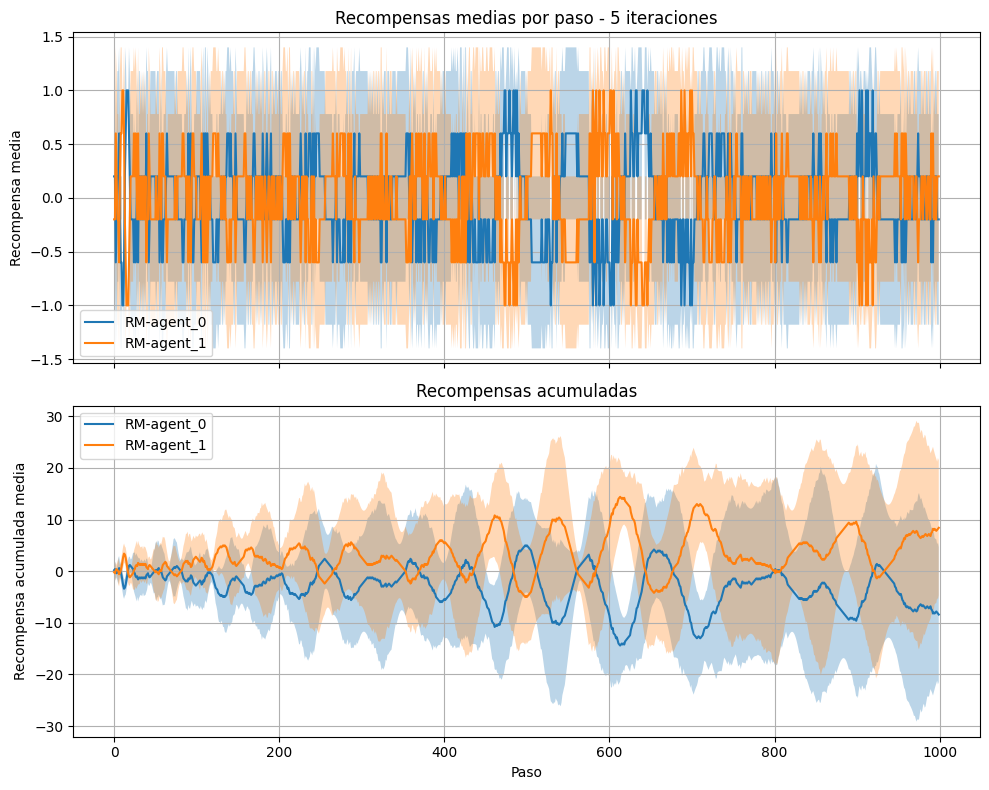

({'agent_0': array([[ 1., -1.,  1.,  1., -1.],
         [-1.,  1.,  1.,  1., -1.],
         [-1.,  1., -1., -1., -1.],
         ...,
         [-1.,  1.,  1., -1., -1.],
         [-1.,  1., -1., -1.,  1.],
         [-1.,  1.,  1., -1., -1.]]),
  'agent_1': array([[-1.,  1., -1., -1.,  1.],
         [ 1., -1., -1., -1.,  1.],
         [ 1., -1.,  1.,  1.,  1.],
         ...,
         [ 1., -1., -1.,  1.,  1.],
         [ 1., -1.,  1.,  1., -1.],
         [ 1., -1., -1.,  1.,  1.]])},
 {'agent_0': array([[0.5       , 0.5       ],
         [0.25      , 0.75      ],
         [0.33333333, 0.66666667],
         ...,
         [0.50449956, 0.49550044],
         [0.50499556, 0.49500444],
         [0.50549056, 0.49450944]]),
  'agent_1': array([[0.5       , 0.5       ],
         [0.5       , 0.5       ],
         [0.5       , 0.5       ],
         ...,
         [0.51322508, 0.48677492],
         [0.51283647, 0.48716353],
         [0.51243474, 0.48756526]])})

In [20]:
# Definir juego
g = MP()

# Definir labels
action_labels = ['$\pi(H)$', '$\pi(T)$']

# Definir parámetros del experimento
NITS = 5           # Cantidad de iteraciones
NSTEPS = int(1e3)  # Cantidad de steps por iteración

# Iterar juegos
iter_game(NITS, NSTEPS, g, agent_classes, action_labels, agent_alias, plot_simplex=True)

# Rock, Paper, Scissors

In [21]:
from games.rps import RPS

Iteración 1/10
Iteración 1 - {'agent_0': array([0.32783194, 0.34094354, 0.33122452]), 'agent_1': array([0.33518086, 0.33783461, 0.32698454])}
Iteración 2/10
Iteración 2 - {'agent_0': array([0.32079012, 0.34188551, 0.33732437]), 'agent_1': array([0.33319805, 0.33835296, 0.32844899])}
Iteración 3/10
Iteración 3 - {'agent_0': array([0.33241124, 0.32839675, 0.33919201]), 'agent_1': array([0.33582878, 0.33873083, 0.32544039])}
Iteración 4/10
Iteración 4 - {'agent_0': array([0.32789241, 0.3343586 , 0.33774899]), 'agent_1': array([0.33782579, 0.32895075, 0.33322346])}
Iteración 5/10
Iteración 5 - {'agent_0': array([0.34503868, 0.33167723, 0.32328409]), 'agent_1': array([0.33817894, 0.33228729, 0.32953378])}
Iteración 6/10
Iteración 6 - {'agent_0': array([0.3358087 , 0.33306249, 0.33112882]), 'agent_1': array([0.3264991 , 0.34059913, 0.33290177])}
Iteración 7/10
Iteración 7 - {'agent_0': array([0.34584876, 0.32739515, 0.32675609]), 'agent_1': array([0.32034868, 0.34013947, 0.33951185])}
Iterac

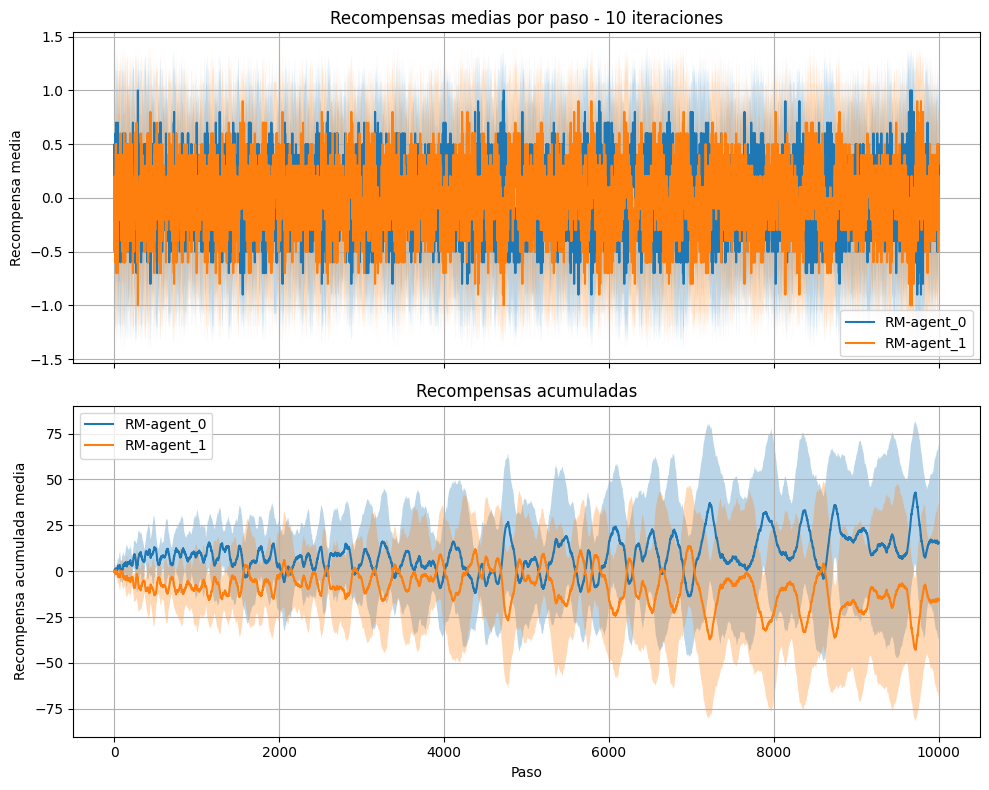

In [22]:
# Definir juego
g = RPS()

# Definir labels
action_labels = ['$\pi(R)$', '$\pi(P)$', '$\pi(S)$']

# Definir parámetros del experimento
NITS = 10           # Cantidad de iteraciones
NSTEPS = int(10e3)  # Cantidad de steps por iteración

# Iterar juegos
rewards, policies = iter_game(NITS, NSTEPS, g, agent_classes, action_labels, agent_alias)

In [23]:
iter_policy = {agent: agent_policies for agent, agent_policies in policies.items()}

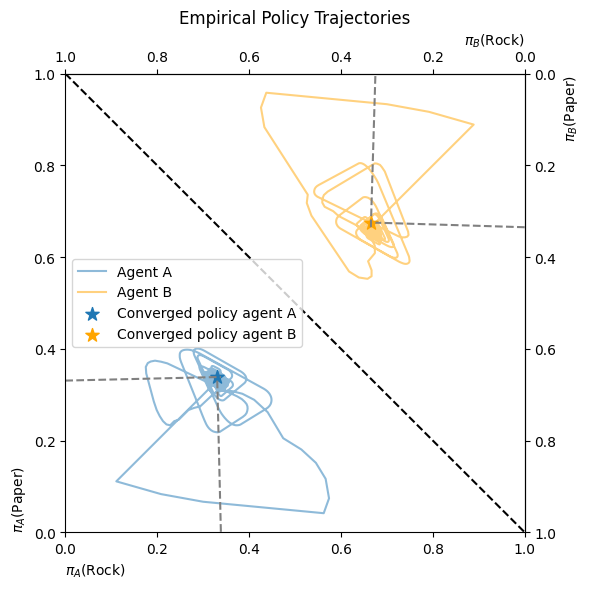

In [24]:
iter_policy = {agent: agent_policies[:,:] for agent, agent_policies in policies.items()}
N = len(iter_policy['agent_0'])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    iter_policy['agent_0'][:, 0],
    iter_policy['agent_0'][:, 1],
    label='Agent A',
    color='tab:blue',
    alpha=0.5
)
ax.plot(
    1 - iter_policy['agent_1'][:, 0],
    1 - iter_policy['agent_1'][:, 1],
    label='Agent B',
    color='orange',
    alpha=0.5
)
ax.scatter(iter_policy['agent_0'][-1, 0], iter_policy['agent_0'][-1, 1],
           color='tab:blue', marker='*', s=100, label='Converged policy agent A')

ax.scatter(1 - iter_policy['agent_1'][-1, 0], 1 - iter_policy['agent_1'][-1, 1],
           color='orange', marker='*', s=100, label='Converged policy agent B')
ax.plot([0, 1], [1, 0], color='black', linestyle='--')

ax.plot([iter_policy['agent_0'][-1, 0], iter_policy['agent_0'][-1, 1]], [iter_policy['agent_0'][-1, 0], 0], color='grey', linestyle='--')
ax.plot([0, iter_policy['agent_0'][-1, 1]], [iter_policy['agent_0'][-1, 0], iter_policy['agent_0'][-1, 1]], color='grey', linestyle='--')

ax.plot([1-iter_policy['agent_1'][-1, 0], 1-iter_policy['agent_1'][-1, 1]], [1-iter_policy['agent_1'][-1, 0], 1], color='grey', linestyle='--')
ax.plot([1, 1-iter_policy['agent_1'][-1, 1]], [1-iter_policy['agent_1'][-1, 0], 1-iter_policy['agent_1'][-1, 1]], color='grey', linestyle='--')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel("$\pi_{A}$(Rock)", loc='left')
ax.set_ylabel("$\pi_{A}$(Paper)", loc='bottom')

ax_top = ax.secondary_xaxis('top', functions=(lambda x: 1 - x, lambda x: 1 - x))
ax_top.set_xlabel("$\pi_{B}$(Rock)", loc='right')

ax_right = ax.secondary_yaxis('right', functions=(lambda y: 1 - y, lambda y: 1 - y))
ax_right.set_ylabel("$\pi_{B}$(Paper)", loc='top')

ax.legend()
ax.set_title("Empirical Policy Trajectories")
plt.tight_layout()
plt.show()

# Blotto  

In [25]:
from games.blotto import Blotto

Iteración 1/10
Iteración 1 - {'agent_0': array([2.22222222e-06, 2.22222222e-06, 5.55555556e-06, 4.63535354e-05,
       7.88888889e-06, 2.00003939e-01, 7.89393939e-05, 5.99848939e-01,
       2.00003939e-01]), 'agent_1': array([2.22222222e-06, 2.22222222e-06, 2.22222222e-06, 4.96111111e-05,
       2.22222222e-06, 1.42807024e-01, 1.42830357e-01, 2.85691492e-01,
       4.28612627e-01])}
Iteración 2/10
Iteración 2 - {'agent_0': array([6.66666667e-06, 6.66666667e-06, 6.66666667e-06, 3.20000000e-05,
       6.66666667e-06, 4.50033333e-03, 4.50033333e-03, 9.86440333e-01,
       4.50033333e-03]), 'agent_1': array([4.44444444e-06, 4.44444444e-06, 7.77777778e-06, 2.39682540e-05,
       4.44444444e-06, 1.63663968e-01, 1.63683968e-01, 3.36293492e-01,
       3.36313492e-01])}
Iteración 3/10
Iteración 3 - {'agent_0': array([2.22222222e-06, 2.22222222e-06, 2.22222222e-06, 5.82222222e-05,
       2.22222222e-06, 3.03822222e-03, 3.02822222e-03, 9.90828222e-01,
       3.03822222e-03]), 'agent_1': array([2.

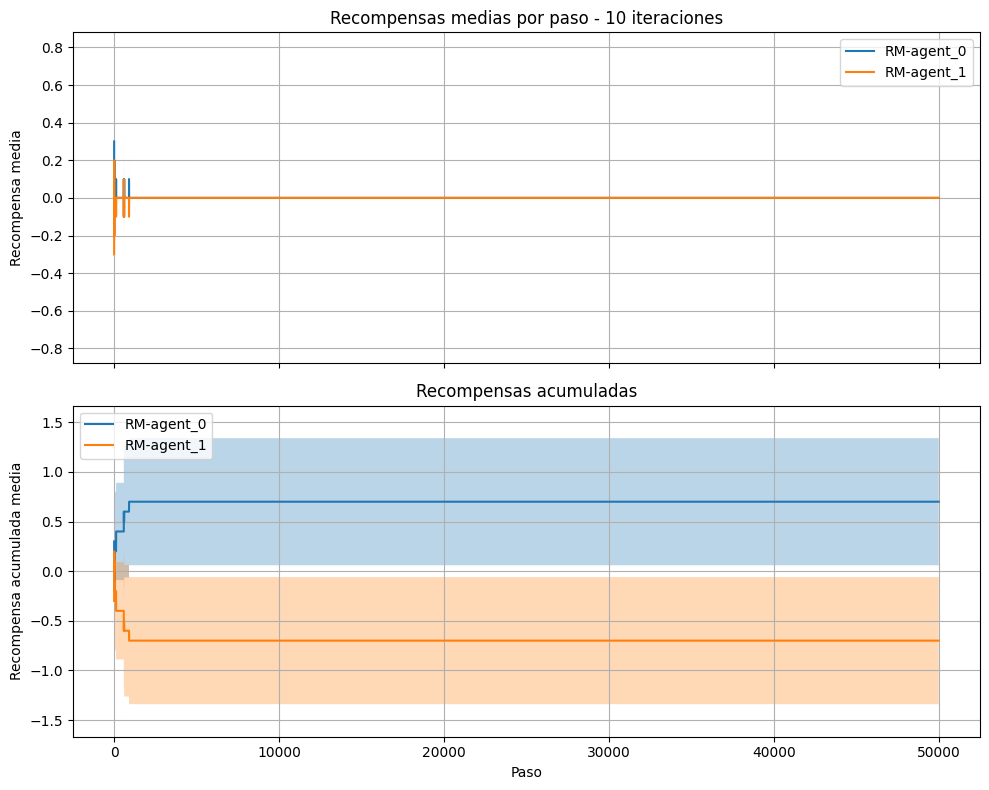

({'agent_0': array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
         [-1.,  1.,  0., ...,  0.,  0.,  0.],
         [ 0., -1.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
  'agent_1': array([[-0., -0., -0., ..., -1., -0., -0.],
         [ 1., -1., -0., ..., -0., -0., -0.],
         [-0.,  1., -0., ..., -0., -0., -0.],
         ...,
         [-0., -0., -0., ..., -0., -0., -0.],
         [-0., -0., -0., ..., -0., -0., -0.],
         [-0., -0., -0., ..., -0., -0., -0.]])},
 {'agent_0': array([[1.11111111e-01, 1.11111111e-01, 1.11111111e-01, ...,
          1.11111111e-01, 1.11111111e-01, 1.11111111e-01],
         [5.55555556e-02, 5.55555556e-02, 5.55555556e-02, ...,
          5.55555556e-02, 3.05555556e-01, 5.55555556e-02],
         [3.70370370e-02, 3.70370370e-02, 3.70370370e-02, ...,
          3.70370370e-02, 5.37037037e-01, 3.70370370e-02],
         ...,
  

In [26]:
# Definir juego
S = 10 # 10
N = 4  # 5
g = Blotto(S=S, N=N)

# Definir labels
action_labels = [f'$\pi(a_{i}={g._moves[i]}$)' for i in range(g.action_spaces['agent_0'].n)]

# Definir parámetros del experimento
NITS = 10          # Cantidad de iteraciones
NSTEPS = int(50e3) # Cantidad de steps por iteración

# Iterar juegos
iter_game(NITS, NSTEPS, g, agent_classes, action_labels, agent_alias)